### **IMPORTAR LIBRERIAS**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### **CARGAR DATASET**

In [2]:
df = pd.read_csv("../data/amazon_reviews_es_clean_spacy.csv")

## **PROCESAMIENTO BASICO**

In [3]:
# Eliminar filas sin texto limpio
df = df.dropna(subset=["clean_body", "stars"])

# Filtrar reseñas con calificación 1-2 (negativas) y 4-5 (positivas)
df = df[df["stars"] != 3]

# Crear variable de sentimiento
df["sentiment"] = df["stars"].apply(lambda x: "neg" if x <= 2 else "pos")

## **SEPARAR VARIABLES**

In [4]:
X = df["clean_body"]              # Texto
y = df["sentiment"]              # Etiqueta: pos o neg

## **DIVIDIR EN TRAIN Y TEST**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **VECTORIZAR EL TEXTO (TF-IDF)**

In [6]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## **ENTRENAR MODELOS**

In [7]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_preds = nb_model.predict(X_test_vec)

# Regresión Logística
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)
lr_preds = lr_model.predict(X_test_vec)


## **EVALUAR MODELOS (MOSTRAMOS LAS METRICAS)**

In [8]:
# Metricas en texto limpio
nb_report = classification_report(y_test, nb_preds, output_dict=True)
lr_report = classification_report(y_test, lr_preds, output_dict=True)

# Matriz de confusión para LR en texto limpio
lr_cm = confusion_matrix(y_test, lr_preds)

(nb_report, lr_report, lr_cm)

({'neg': {'precision': 0.8321237929586757,
   'recall': 0.82904093217807,
   'f1-score': 0.8305795019157088,
   'support': 16735.0},
  'pos': {'precision': 0.8307701407784218,
   'recall': 0.833828069342199,
   'f1-score': 0.8322962962962963,
   'support': 16844.0},
  'accuracy': 0.8314422704666607,
  'macro avg': {'precision': 0.8314469668685487,
   'recall': 0.8314345007601345,
   'f1-score': 0.8314378991060025,
   'support': 33579.0},
  'weighted avg': {'precision': 0.8314447698393393,
   'recall': 0.8314422704666607,
   'f1-score': 0.8314406855288782,
   'support': 33579.0}},
 {'neg': {'precision': 0.8380851812741992,
   'recall': 0.8536599940244995,
   'f1-score': 0.8458008939936651,
   'support': 16735.0},
  'pos': {'precision': 0.8518720135486603,
   'recall': 0.8361434338636904,
   'f1-score': 0.8439344458759026,
   'support': 16844.0},
  'accuracy': 0.8448732838976741,
  'macro avg': {'precision': 0.8449785974114297,
   'recall': 0.844901713944095,
   'f1-score': 0.84486766993

In [9]:
# Comparacion de resultados
print("🔍 Resultados - Naive Bayes:")
print(classification_report(y_test, nb_preds))

print("🔍 Resultados - Regresión Logística:")
print(classification_report(y_test, lr_preds))

🔍 Resultados - Naive Bayes:
              precision    recall  f1-score   support

         neg       0.83      0.83      0.83     16735
         pos       0.83      0.83      0.83     16844

    accuracy                           0.83     33579
   macro avg       0.83      0.83      0.83     33579
weighted avg       0.83      0.83      0.83     33579

🔍 Resultados - Regresión Logística:
              precision    recall  f1-score   support

         neg       0.84      0.85      0.85     16735
         pos       0.85      0.84      0.84     16844

    accuracy                           0.84     33579
   macro avg       0.84      0.84      0.84     33579
weighted avg       0.85      0.84      0.84     33579



## **MATRIZ DE CONFUSION - DE LA REGRESION LOGISTICA**

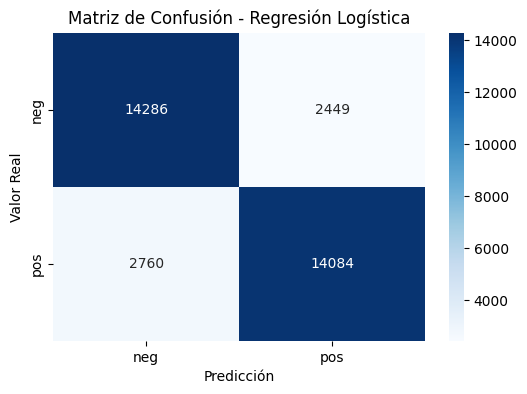

In [10]:
cm = confusion_matrix(y_test, lr_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["neg", "pos"], yticklabels=["neg", "pos"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


🔹 Modelo 1: Naive Bayes

Precisión (positivas): 83.1%

Precisión (negativas): 83.2%

F1 Score promedio: 83.1%

Accuracy: 83.1%

🔹 Modelo 2: Regresión Logística

Precisión (positivas): 85.2%

Precisión (negativas): 83.8%

F1 Score promedio: 84.5%

Accuracy: 84.5%

📌 La regresión logística superó a Naive Bayes en todas las métricas.

🔸 Matriz de confusión para Regresión Logística:

Verdaderos negativos: 14,285

Falsos positivos: 2,450

Falsos negativos: 2,756

Verdaderos positivos: 14,088